## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  62.279083   816.401896  0.109120  8.822327  1.089682
1   0.386027   306.929655  0.534901  6.013777  1.722340
2  72.110704  1216.162804  0.611781  8.253826  1.513646
3  93.753086   375.336887  0.448124  4.075323  1.049043
4  22.728259   509.786854  0.886830  8.376397  1.523318


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.1089  | train_mse: 2.98002 | train_mae: 1.36738 |  0:00:00s
epoch 1  | loss: 0.81433 | train_mse: 2.04178 | train_mae: 1.11227 |  0:00:00s
epoch 2  | loss: 0.62469 | train_mse: 1.42088 | train_mae: 0.91695 |  0:00:00s


epoch 3  | loss: 0.61433 | train_mse: 1.21289 | train_mae: 0.83989 |  0:00:00s
epoch 4  | loss: 0.76353 | train_mse: 1.28184 | train_mae: 0.83623 |  0:00:00s
epoch 5  | loss: 0.70423 | train_mse: 0.9214  | train_mae: 0.73815 |  0:00:00s


epoch 6  | loss: 0.44187 | train_mse: 0.77358 | train_mae: 0.69541 |  0:00:00s
epoch 7  | loss: 0.49194 | train_mse: 0.75935 | train_mae: 0.71024 |  0:00:00s
epoch 8  | loss: 0.53882 | train_mse: 0.83756 | train_mae: 0.71931 |  0:00:00s


epoch 9  | loss: 0.66671 | train_mse: 0.77181 | train_mae: 0.64885 |  0:00:01s
epoch 10 | loss: 0.39028 | train_mse: 0.55638 | train_mae: 0.55791 |  0:00:01s
epoch 11 | loss: 0.52746 | train_mse: 0.62205 | train_mae: 0.58101 |  0:00:01s


epoch 12 | loss: 0.59183 | train_mse: 0.59724 | train_mae: 0.56502 |  0:00:01s
epoch 13 | loss: 0.36965 | train_mse: 0.55025 | train_mae: 0.56383 |  0:00:01s
epoch 14 | loss: 0.44572 | train_mse: 0.46315 | train_mae: 0.51678 |  0:00:01s


epoch 15 | loss: 0.51814 | train_mse: 0.36424 | train_mae: 0.44067 |  0:00:01s
epoch 16 | loss: 0.45415 | train_mse: 0.34281 | train_mae: 0.4345  |  0:00:01s
epoch 17 | loss: 0.37177 | train_mse: 0.34102 | train_mae: 0.44804 |  0:00:01s


epoch 18 | loss: 0.4084  | train_mse: 0.36984 | train_mae: 0.49091 |  0:00:01s
epoch 19 | loss: 0.27758 | train_mse: 0.33083 | train_mae: 0.45668 |  0:00:01s
epoch 20 | loss: 0.31354 | train_mse: 0.27374 | train_mae: 0.40042 |  0:00:01s


epoch 21 | loss: 0.39014 | train_mse: 0.3317  | train_mae: 0.44216 |  0:00:02s
epoch 22 | loss: 0.29482 | train_mse: 0.31874 | train_mae: 0.42327 |  0:00:02s


epoch 23 | loss: 0.2863  | train_mse: 0.26235 | train_mae: 0.39854 |  0:00:02s
epoch 24 | loss: 0.29839 | train_mse: 0.29465 | train_mae: 0.41132 |  0:00:02s
epoch 25 | loss: 0.43624 | train_mse: 0.26952 | train_mae: 0.39005 |  0:00:02s


epoch 26 | loss: 0.35684 | train_mse: 0.27746 | train_mae: 0.399   |  0:00:02s
epoch 27 | loss: 0.30305 | train_mse: 0.27782 | train_mae: 0.39513 |  0:00:02s
epoch 28 | loss: 0.29248 | train_mse: 0.24264 | train_mae: 0.38683 |  0:00:02s


epoch 29 | loss: 0.40808 | train_mse: 0.31524 | train_mae: 0.43817 |  0:00:02s
epoch 30 | loss: 0.26497 | train_mse: 0.35334 | train_mae: 0.45465 |  0:00:02s
epoch 31 | loss: 0.26266 | train_mse: 0.33603 | train_mae: 0.44898 |  0:00:03s


epoch 32 | loss: 0.34461 | train_mse: 0.31844 | train_mae: 0.43137 |  0:00:03s
epoch 33 | loss: 0.27824 | train_mse: 0.28384 | train_mae: 0.38241 |  0:00:03s
epoch 34 | loss: 0.33105 | train_mse: 0.33023 | train_mae: 0.41906 |  0:00:03s


epoch 35 | loss: 0.30695 | train_mse: 0.30579 | train_mae: 0.41645 |  0:00:03s
epoch 36 | loss: 0.26146 | train_mse: 0.44773 | train_mae: 0.4383  |  0:00:03s
epoch 37 | loss: 0.41232 | train_mse: 0.53067 | train_mae: 0.49434 |  0:00:03s


epoch 38 | loss: 0.36246 | train_mse: 0.36573 | train_mae: 0.44338 |  0:00:03s
epoch 39 | loss: 0.37404 | train_mse: 0.37248 | train_mae: 0.43524 |  0:00:03s
epoch 40 | loss: 0.31253 | train_mse: 0.39457 | train_mae: 0.45409 |  0:00:03s


epoch 41 | loss: 0.41182 | train_mse: 0.44488 | train_mae: 0.4636  |  0:00:03s
epoch 42 | loss: 0.317   | train_mse: 0.38576 | train_mae: 0.41877 |  0:00:03s
epoch 43 | loss: 0.39119 | train_mse: 0.3121  | train_mae: 0.39535 |  0:00:04s


epoch 44 | loss: 0.30808 | train_mse: 0.24212 | train_mae: 0.37431 |  0:00:04s
epoch 45 | loss: 0.23142 | train_mse: 0.20968 | train_mae: 0.34779 |  0:00:04s
epoch 46 | loss: 0.27594 | train_mse: 0.19318 | train_mae: 0.32422 |  0:00:04s


epoch 47 | loss: 0.19687 | train_mse: 0.17063 | train_mae: 0.315   |  0:00:04s
epoch 48 | loss: 0.2102  | train_mse: 0.17171 | train_mae: 0.31269 |  0:00:04s
epoch 49 | loss: 0.21909 | train_mse: 0.17545 | train_mae: 0.31687 |  0:00:04s


epoch 50 | loss: 0.22296 | train_mse: 0.19063 | train_mae: 0.33427 |  0:00:04s
epoch 51 | loss: 0.21989 | train_mse: 0.17315 | train_mae: 0.33147 |  0:00:04s
epoch 52 | loss: 0.27303 | train_mse: 0.22566 | train_mae: 0.36349 |  0:00:04s


epoch 53 | loss: 0.30758 | train_mse: 0.23688 | train_mae: 0.36688 |  0:00:04s
epoch 54 | loss: 0.2641  | train_mse: 0.26412 | train_mae: 0.38689 |  0:00:04s
epoch 55 | loss: 0.26212 | train_mse: 0.24888 | train_mae: 0.37693 |  0:00:05s


epoch 56 | loss: 0.31521 | train_mse: 0.23851 | train_mae: 0.3611  |  0:00:05s
epoch 57 | loss: 0.32718 | train_mse: 0.2304  | train_mae: 0.36841 |  0:00:05s
epoch 58 | loss: 0.27927 | train_mse: 0.19949 | train_mae: 0.35232 |  0:00:05s


epoch 59 | loss: 0.26415 | train_mse: 0.15807 | train_mae: 0.31452 |  0:00:05s
epoch 60 | loss: 0.54158 | train_mse: 0.15983 | train_mae: 0.31908 |  0:00:05s
epoch 61 | loss: 0.26329 | train_mse: 0.18138 | train_mae: 0.32774 |  0:00:05s


epoch 62 | loss: 0.26267 | train_mse: 0.15214 | train_mae: 0.3054  |  0:00:05s
epoch 63 | loss: 0.23327 | train_mse: 0.13346 | train_mae: 0.29658 |  0:00:05s
epoch 64 | loss: 0.21517 | train_mse: 0.14486 | train_mae: 0.30459 |  0:00:05s


epoch 65 | loss: 0.17648 | train_mse: 0.14612 | train_mae: 0.29534 |  0:00:05s
epoch 66 | loss: 0.14971 | train_mse: 0.14307 | train_mae: 0.29111 |  0:00:06s


epoch 67 | loss: 0.19797 | train_mse: 0.16549 | train_mae: 0.30339 |  0:00:06s
epoch 68 | loss: 0.19917 | train_mse: 0.15567 | train_mae: 0.30264 |  0:00:06s
epoch 69 | loss: 0.1914  | train_mse: 0.15156 | train_mae: 0.29477 |  0:00:06s


epoch 70 | loss: 0.31206 | train_mse: 0.13517 | train_mae: 0.29272 |  0:00:06s
epoch 71 | loss: 0.21647 | train_mse: 0.13071 | train_mae: 0.29288 |  0:00:06s
epoch 72 | loss: 0.20524 | train_mse: 0.13616 | train_mae: 0.29572 |  0:00:06s


epoch 73 | loss: 0.2555  | train_mse: 0.13525 | train_mae: 0.28384 |  0:00:06s
epoch 74 | loss: 0.46689 | train_mse: 0.13601 | train_mae: 0.29105 |  0:00:06s
epoch 75 | loss: 0.20742 | train_mse: 0.15059 | train_mae: 0.30151 |  0:00:06s


epoch 76 | loss: 0.19667 | train_mse: 0.13804 | train_mae: 0.29361 |  0:00:06s
epoch 77 | loss: 0.21844 | train_mse: 0.13004 | train_mae: 0.29039 |  0:00:06s
epoch 78 | loss: 0.19746 | train_mse: 0.1369  | train_mae: 0.28382 |  0:00:07s


epoch 79 | loss: 0.22322 | train_mse: 0.16653 | train_mae: 0.30561 |  0:00:07s
epoch 80 | loss: 0.18201 | train_mse: 0.12952 | train_mae: 0.2768  |  0:00:07s
epoch 81 | loss: 0.16844 | train_mse: 0.10926 | train_mae: 0.26341 |  0:00:07s


epoch 82 | loss: 0.18006 | train_mse: 0.12547 | train_mae: 0.27598 |  0:00:07s
epoch 83 | loss: 0.13291 | train_mse: 0.14403 | train_mae: 0.28631 |  0:00:07s
epoch 84 | loss: 0.22219 | train_mse: 0.13674 | train_mae: 0.27865 |  0:00:07s


epoch 85 | loss: 0.14854 | train_mse: 0.11403 | train_mae: 0.25546 |  0:00:07s
epoch 86 | loss: 0.19422 | train_mse: 0.13809 | train_mae: 0.28363 |  0:00:07s
epoch 87 | loss: 0.28223 | train_mse: 0.16224 | train_mae: 0.30488 |  0:00:07s


epoch 88 | loss: 0.15061 | train_mse: 0.15847 | train_mae: 0.30667 |  0:00:07s
epoch 89 | loss: 0.19002 | train_mse: 0.16076 | train_mae: 0.30892 |  0:00:08s
epoch 90 | loss: 0.23628 | train_mse: 0.16509 | train_mae: 0.31109 |  0:00:08s


epoch 91 | loss: 0.20221 | train_mse: 0.14063 | train_mae: 0.28815 |  0:00:08s
epoch 92 | loss: 0.15815 | train_mse: 0.12846 | train_mae: 0.27979 |  0:00:08s
epoch 93 | loss: 0.13589 | train_mse: 0.13695 | train_mae: 0.28846 |  0:00:08s


epoch 94 | loss: 0.16108 | train_mse: 0.14516 | train_mae: 0.29163 |  0:00:08s
epoch 95 | loss: 0.19965 | train_mse: 0.17399 | train_mae: 0.30615 |  0:00:08s
epoch 96 | loss: 0.15434 | train_mse: 0.16731 | train_mae: 0.30221 |  0:00:08s


epoch 97 | loss: 0.13508 | train_mse: 0.15033 | train_mae: 0.28661 |  0:00:08s
epoch 98 | loss: 0.38393 | train_mse: 0.1459  | train_mae: 0.28582 |  0:00:08s
epoch 99 | loss: 0.22502 | train_mse: 0.14007 | train_mae: 0.28499 |  0:00:08s


epoch 100| loss: 0.16012 | train_mse: 0.13367 | train_mae: 0.28751 |  0:00:08s
epoch 101| loss: 0.16235 | train_mse: 0.1293  | train_mae: 0.28515 |  0:00:09s
epoch 102| loss: 0.17769 | train_mse: 0.13769 | train_mae: 0.2966  |  0:00:09s


epoch 103| loss: 0.20557 | train_mse: 0.14478 | train_mae: 0.29452 |  0:00:09s
epoch 104| loss: 0.13756 | train_mse: 0.14384 | train_mae: 0.29307 |  0:00:09s
epoch 105| loss: 0.17752 | train_mse: 0.15095 | train_mae: 0.30698 |  0:00:09s


epoch 106| loss: 0.2008  | train_mse: 0.14435 | train_mae: 0.30608 |  0:00:09s
epoch 107| loss: 0.17395 | train_mse: 0.1435  | train_mae: 0.30595 |  0:00:09s


epoch 108| loss: 0.13467 | train_mse: 0.15048 | train_mae: 0.30578 |  0:00:09s
epoch 109| loss: 0.18463 | train_mse: 0.15925 | train_mae: 0.30633 |  0:00:09s
epoch 110| loss: 0.17601 | train_mse: 0.14828 | train_mae: 0.29915 |  0:00:09s


epoch 111| loss: 0.16112 | train_mse: 0.13932 | train_mae: 0.29122 |  0:00:09s
epoch 112| loss: 0.16095 | train_mse: 0.1343  | train_mae: 0.28325 |  0:00:09s


epoch 113| loss: 0.17246 | train_mse: 0.12396 | train_mae: 0.27321 |  0:00:10s
epoch 114| loss: 0.1159  | train_mse: 0.12368 | train_mae: 0.27574 |  0:00:10s
epoch 115| loss: 0.14948 | train_mse: 0.13579 | train_mae: 0.28756 |  0:00:10s


epoch 116| loss: 0.16317 | train_mse: 0.15176 | train_mae: 0.29096 |  0:00:10s
epoch 117| loss: 0.16235 | train_mse: 0.17013 | train_mae: 0.31131 |  0:00:10s
epoch 118| loss: 0.12761 | train_mse: 0.1544  | train_mae: 0.30314 |  0:00:10s


epoch 119| loss: 0.20758 | train_mse: 0.14976 | train_mae: 0.29193 |  0:00:10s
epoch 120| loss: 0.13116 | train_mse: 0.15425 | train_mae: 0.29999 |  0:00:10s
epoch 121| loss: 0.20147 | train_mse: 0.17987 | train_mae: 0.33684 |  0:00:10s


epoch 122| loss: 0.15331 | train_mse: 0.14001 | train_mae: 0.2879  |  0:00:10s
epoch 123| loss: 0.11439 | train_mse: 0.12372 | train_mae: 0.26995 |  0:00:10s
epoch 124| loss: 0.12161 | train_mse: 0.12519 | train_mae: 0.27801 |  0:00:11s


epoch 125| loss: 0.17097 | train_mse: 0.12916 | train_mae: 0.27853 |  0:00:11s
epoch 126| loss: 0.15301 | train_mse: 0.14417 | train_mae: 0.28747 |  0:00:11s
epoch 127| loss: 0.23662 | train_mse: 0.12618 | train_mae: 0.27215 |  0:00:11s


epoch 128| loss: 0.12545 | train_mse: 0.11896 | train_mae: 0.26327 |  0:00:11s
epoch 129| loss: 0.12584 | train_mse: 0.1129  | train_mae: 0.25496 |  0:00:11s
epoch 130| loss: 0.14279 | train_mse: 0.12857 | train_mae: 0.25977 |  0:00:11s


epoch 131| loss: 0.20123 | train_mse: 0.15804 | train_mae: 0.29425 |  0:00:11s
epoch 132| loss: 0.1754  | train_mse: 0.16131 | train_mae: 0.29871 |  0:00:11s
epoch 133| loss: 0.14619 | train_mse: 0.12293 | train_mae: 0.26901 |  0:00:11s


epoch 134| loss: 0.13287 | train_mse: 0.11395 | train_mae: 0.26337 |  0:00:11s
epoch 135| loss: 0.24454 | train_mse: 0.10857 | train_mae: 0.25103 |  0:00:11s
epoch 136| loss: 0.1329  | train_mse: 0.10909 | train_mae: 0.25344 |  0:00:12s


epoch 137| loss: 0.17793 | train_mse: 0.11417 | train_mae: 0.26243 |  0:00:12s
epoch 138| loss: 0.13322 | train_mse: 0.12571 | train_mae: 0.26799 |  0:00:12s
epoch 139| loss: 0.15951 | train_mse: 0.13441 | train_mae: 0.26539 |  0:00:12s


epoch 140| loss: 0.23488 | train_mse: 0.14424 | train_mae: 0.26882 |  0:00:12s
epoch 141| loss: 0.16675 | train_mse: 0.1231  | train_mae: 0.25558 |  0:00:12s
epoch 142| loss: 0.14137 | train_mse: 0.13921 | train_mae: 0.28415 |  0:00:12s


epoch 143| loss: 0.16923 | train_mse: 0.13471 | train_mae: 0.28281 |  0:00:12s
epoch 144| loss: 0.12825 | train_mse: 0.11594 | train_mae: 0.26412 |  0:00:12s
epoch 145| loss: 0.16095 | train_mse: 0.11138 | train_mae: 0.25849 |  0:00:12s


epoch 146| loss: 0.18173 | train_mse: 0.10986 | train_mae: 0.25599 |  0:00:12s
epoch 147| loss: 0.2603  | train_mse: 0.11576 | train_mae: 0.2653  |  0:00:13s
epoch 148| loss: 0.11388 | train_mse: 0.10922 | train_mae: 0.25666 |  0:00:13s


epoch 149| loss: 0.11801 | train_mse: 0.10477 | train_mae: 0.25162 |  0:00:13s
epoch 150| loss: 0.19245 | train_mse: 0.11432 | train_mae: 0.26713 |  0:00:13s
epoch 151| loss: 0.1374  | train_mse: 0.11265 | train_mae: 0.2696  |  0:00:13s


epoch 152| loss: 0.12283 | train_mse: 0.10419 | train_mae: 0.25819 |  0:00:13s
epoch 153| loss: 0.1473  | train_mse: 0.09737 | train_mae: 0.23929 |  0:00:13s


epoch 154| loss: 0.1336  | train_mse: 0.10997 | train_mae: 0.25273 |  0:00:13s
epoch 155| loss: 0.12778 | train_mse: 0.1062  | train_mae: 0.24979 |  0:00:13s
epoch 156| loss: 0.12458 | train_mse: 0.09908 | train_mae: 0.23946 |  0:00:13s


epoch 157| loss: 0.23214 | train_mse: 0.10539 | train_mae: 0.24634 |  0:00:13s
epoch 158| loss: 0.13114 | train_mse: 0.10935 | train_mae: 0.24713 |  0:00:14s


epoch 159| loss: 0.17043 | train_mse: 0.10296 | train_mae: 0.2503  |  0:00:14s
epoch 160| loss: 0.14335 | train_mse: 0.09797 | train_mae: 0.24849 |  0:00:14s
epoch 161| loss: 0.1201  | train_mse: 0.09193 | train_mae: 0.244   |  0:00:14s


epoch 162| loss: 0.1222  | train_mse: 0.08932 | train_mae: 0.23171 |  0:00:14s
epoch 163| loss: 0.1155  | train_mse: 0.09151 | train_mae: 0.23611 |  0:00:14s
epoch 164| loss: 0.10366 | train_mse: 0.09338 | train_mae: 0.23868 |  0:00:14s


epoch 165| loss: 0.12279 | train_mse: 0.1019  | train_mae: 0.25073 |  0:00:14s
epoch 166| loss: 0.15552 | train_mse: 0.0948  | train_mae: 0.24304 |  0:00:14s
epoch 167| loss: 0.17956 | train_mse: 0.08946 | train_mae: 0.23328 |  0:00:14s


epoch 168| loss: 0.10812 | train_mse: 0.08296 | train_mae: 0.22076 |  0:00:14s
epoch 169| loss: 0.13092 | train_mse: 0.08557 | train_mae: 0.21803 |  0:00:15s
epoch 170| loss: 0.15365 | train_mse: 0.08156 | train_mae: 0.21231 |  0:00:15s


epoch 171| loss: 0.14279 | train_mse: 0.08265 | train_mae: 0.2196  |  0:00:15s
epoch 172| loss: 0.11986 | train_mse: 0.09188 | train_mae: 0.23263 |  0:00:15s
epoch 173| loss: 0.1241  | train_mse: 0.099   | train_mae: 0.23462 |  0:00:15s


epoch 174| loss: 0.15626 | train_mse: 0.09695 | train_mae: 0.22788 |  0:00:15s
epoch 175| loss: 0.13173 | train_mse: 0.08832 | train_mae: 0.22043 |  0:00:15s
epoch 176| loss: 0.09843 | train_mse: 0.08496 | train_mae: 0.22654 |  0:00:15s


epoch 177| loss: 0.14737 | train_mse: 0.09107 | train_mae: 0.23362 |  0:00:15s
epoch 178| loss: 0.10621 | train_mse: 0.10371 | train_mae: 0.23925 |  0:00:15s
epoch 179| loss: 0.13635 | train_mse: 0.1154  | train_mae: 0.25297 |  0:00:15s


epoch 180| loss: 0.2019  | train_mse: 0.1267  | train_mae: 0.26452 |  0:00:16s
epoch 181| loss: 0.14126 | train_mse: 0.10573 | train_mae: 0.24316 |  0:00:16s
epoch 182| loss: 0.11382 | train_mse: 0.08888 | train_mae: 0.23124 |  0:00:16s


epoch 183| loss: 0.18136 | train_mse: 0.09563 | train_mae: 0.24333 |  0:00:16s
epoch 184| loss: 0.14047 | train_mse: 0.10477 | train_mae: 0.25293 |  0:00:16s
epoch 185| loss: 0.18817 | train_mse: 0.11323 | train_mae: 0.25716 |  0:00:16s


epoch 186| loss: 0.12157 | train_mse: 0.1049  | train_mae: 0.24566 |  0:00:16s
epoch 187| loss: 0.14283 | train_mse: 0.10081 | train_mae: 0.23949 |  0:00:16s
epoch 188| loss: 0.11284 | train_mse: 0.11184 | train_mae: 0.25432 |  0:00:16s


epoch 189| loss: 0.13923 | train_mse: 0.09958 | train_mae: 0.24663 |  0:00:16s
epoch 190| loss: 0.12311 | train_mse: 0.08476 | train_mae: 0.22675 |  0:00:16s
epoch 191| loss: 0.10235 | train_mse: 0.09188 | train_mae: 0.23969 |  0:00:16s


epoch 192| loss: 0.13941 | train_mse: 0.09116 | train_mae: 0.2372  |  0:00:17s
epoch 193| loss: 0.13776 | train_mse: 0.10003 | train_mae: 0.2535  |  0:00:17s
epoch 194| loss: 0.19027 | train_mse: 0.09841 | train_mae: 0.24911 |  0:00:17s


epoch 195| loss: 0.10095 | train_mse: 0.09617 | train_mae: 0.23978 |  0:00:17s
epoch 196| loss: 0.09947 | train_mse: 0.08578 | train_mae: 0.22216 |  0:00:17s
epoch 197| loss: 0.114   | train_mse: 0.0835  | train_mae: 0.21865 |  0:00:17s


epoch 198| loss: 0.12249 | train_mse: 0.08652 | train_mae: 0.22576 |  0:00:17s
epoch 199| loss: 0.10805 | train_mse: 0.08647 | train_mae: 0.22209 |  0:00:17s
epoch 200| loss: 0.10215 | train_mse: 0.07995 | train_mae: 0.21128 |  0:00:17s


epoch 201| loss: 0.12231 | train_mse: 0.09121 | train_mae: 0.23401 |  0:00:17s
epoch 202| loss: 0.11927 | train_mse: 0.10141 | train_mae: 0.24873 |  0:00:17s
epoch 203| loss: 0.26232 | train_mse: 0.11382 | train_mae: 0.25757 |  0:00:17s


epoch 204| loss: 0.14782 | train_mse: 0.098   | train_mae: 0.23743 |  0:00:18s
epoch 205| loss: 0.18529 | train_mse: 0.08612 | train_mae: 0.2159  |  0:00:18s
epoch 206| loss: 0.13361 | train_mse: 0.08038 | train_mae: 0.20899 |  0:00:18s


epoch 207| loss: 0.13053 | train_mse: 0.08176 | train_mae: 0.21328 |  0:00:18s
epoch 208| loss: 0.15347 | train_mse: 0.08552 | train_mae: 0.21172 |  0:00:18s
epoch 209| loss: 0.14816 | train_mse: 0.09235 | train_mae: 0.22606 |  0:00:18s


epoch 210| loss: 0.0933  | train_mse: 0.09428 | train_mae: 0.24053 |  0:00:18s
epoch 211| loss: 0.11675 | train_mse: 0.09463 | train_mae: 0.24153 |  0:00:18s
epoch 212| loss: 0.13183 | train_mse: 0.08068 | train_mae: 0.21933 |  0:00:18s


epoch 213| loss: 0.10669 | train_mse: 0.07641 | train_mae: 0.2146  |  0:00:18s
epoch 214| loss: 0.09393 | train_mse: 0.07725 | train_mae: 0.21352 |  0:00:18s
epoch 215| loss: 0.09846 | train_mse: 0.07472 | train_mae: 0.20846 |  0:00:18s


epoch 216| loss: 0.10846 | train_mse: 0.07304 | train_mae: 0.20661 |  0:00:18s
epoch 217| loss: 0.16632 | train_mse: 0.08113 | train_mae: 0.22098 |  0:00:19s
epoch 218| loss: 0.10416 | train_mse: 0.07502 | train_mae: 0.21066 |  0:00:19s


epoch 219| loss: 0.13951 | train_mse: 0.07462 | train_mae: 0.2149  |  0:00:19s
epoch 220| loss: 0.08887 | train_mse: 0.07887 | train_mae: 0.22466 |  0:00:19s
epoch 221| loss: 0.07691 | train_mse: 0.07806 | train_mae: 0.21312 |  0:00:19s


epoch 222| loss: 0.16316 | train_mse: 0.09553 | train_mae: 0.23696 |  0:00:19s
epoch 223| loss: 0.11878 | train_mse: 0.09827 | train_mae: 0.24338 |  0:00:19s
epoch 224| loss: 0.20769 | train_mse: 0.08222 | train_mae: 0.22529 |  0:00:19s


epoch 225| loss: 0.17418 | train_mse: 0.09558 | train_mae: 0.24022 |  0:00:19s
epoch 226| loss: 0.19389 | train_mse: 0.07062 | train_mae: 0.19936 |  0:00:19s
epoch 227| loss: 0.17623 | train_mse: 0.07768 | train_mae: 0.21678 |  0:00:19s


epoch 228| loss: 0.10269 | train_mse: 0.08865 | train_mae: 0.23469 |  0:00:19s
epoch 229| loss: 0.11631 | train_mse: 0.07879 | train_mae: 0.22053 |  0:00:20s
epoch 230| loss: 0.1047  | train_mse: 0.08467 | train_mae: 0.2371  |  0:00:20s


epoch 231| loss: 0.11628 | train_mse: 0.08116 | train_mae: 0.23368 |  0:00:20s
epoch 232| loss: 0.0861  | train_mse: 0.06576 | train_mae: 0.20193 |  0:00:20s
epoch 233| loss: 0.13233 | train_mse: 0.07128 | train_mae: 0.20004 |  0:00:20s


epoch 234| loss: 0.1593  | train_mse: 0.0881  | train_mae: 0.22036 |  0:00:20s
epoch 235| loss: 0.13774 | train_mse: 0.0959  | train_mae: 0.23906 |  0:00:20s
epoch 236| loss: 0.17    | train_mse: 0.10279 | train_mae: 0.24274 |  0:00:20s


epoch 237| loss: 0.15688 | train_mse: 0.10634 | train_mae: 0.24849 |  0:00:20s
epoch 238| loss: 0.11231 | train_mse: 0.1203  | train_mae: 0.27369 |  0:00:20s
epoch 239| loss: 0.16349 | train_mse: 0.10122 | train_mae: 0.24957 |  0:00:20s


epoch 240| loss: 0.11112 | train_mse: 0.08603 | train_mae: 0.22387 |  0:00:20s
epoch 241| loss: 0.16779 | train_mse: 0.08532 | train_mae: 0.23054 |  0:00:21s
epoch 242| loss: 0.16203 | train_mse: 0.08718 | train_mae: 0.23557 |  0:00:21s


epoch 243| loss: 0.09335 | train_mse: 0.08545 | train_mae: 0.22931 |  0:00:21s
epoch 244| loss: 0.11614 | train_mse: 0.08492 | train_mae: 0.22497 |  0:00:21s
epoch 245| loss: 0.17985 | train_mse: 0.07272 | train_mae: 0.20369 |  0:00:21s


epoch 246| loss: 0.11027 | train_mse: 0.08906 | train_mae: 0.22771 |  0:00:21s
epoch 247| loss: 0.14715 | train_mse: 0.08854 | train_mae: 0.23236 |  0:00:21s
epoch 248| loss: 0.12968 | train_mse: 0.09489 | train_mae: 0.24068 |  0:00:21s


epoch 249| loss: 0.11658 | train_mse: 0.08568 | train_mae: 0.22134 |  0:00:21s
epoch 250| loss: 0.10512 | train_mse: 0.08701 | train_mae: 0.22129 |  0:00:21s
epoch 251| loss: 0.17975 | train_mse: 0.08078 | train_mae: 0.21251 |  0:00:21s


epoch 252| loss: 0.14419 | train_mse: 0.07882 | train_mae: 0.21842 |  0:00:21s
epoch 253| loss: 0.09648 | train_mse: 0.1037  | train_mae: 0.24934 |  0:00:22s
epoch 254| loss: 0.1086  | train_mse: 0.09693 | train_mae: 0.23271 |  0:00:22s


epoch 255| loss: 0.12703 | train_mse: 0.07879 | train_mae: 0.21365 |  0:00:22s
epoch 256| loss: 0.12534 | train_mse: 0.07833 | train_mae: 0.21579 |  0:00:22s
epoch 257| loss: 0.24625 | train_mse: 0.08511 | train_mae: 0.22589 |  0:00:22s


epoch 258| loss: 0.10438 | train_mse: 0.09751 | train_mae: 0.24705 |  0:00:22s
epoch 259| loss: 0.09486 | train_mse: 0.09686 | train_mae: 0.24452 |  0:00:22s
epoch 260| loss: 0.09765 | train_mse: 0.10094 | train_mae: 0.25366 |  0:00:22s


epoch 261| loss: 0.17526 | train_mse: 0.07875 | train_mae: 0.21944 |  0:00:22s
epoch 262| loss: 0.07594 | train_mse: 0.06902 | train_mae: 0.20414 |  0:00:22s
epoch 263| loss: 0.10338 | train_mse: 0.07181 | train_mae: 0.21112 |  0:00:22s


epoch 264| loss: 0.10619 | train_mse: 0.08896 | train_mae: 0.23746 |  0:00:22s
epoch 265| loss: 0.10144 | train_mse: 0.10487 | train_mae: 0.25396 |  0:00:23s
epoch 266| loss: 0.08992 | train_mse: 0.09238 | train_mae: 0.23744 |  0:00:23s


epoch 267| loss: 0.2776  | train_mse: 0.09301 | train_mae: 0.24358 |  0:00:23s
epoch 268| loss: 0.11335 | train_mse: 0.08805 | train_mae: 0.23622 |  0:00:23s
epoch 269| loss: 0.1087  | train_mse: 0.1088  | train_mae: 0.26249 |  0:00:23s


epoch 270| loss: 0.13933 | train_mse: 0.07334 | train_mae: 0.20552 |  0:00:23s
epoch 271| loss: 0.10914 | train_mse: 0.06965 | train_mae: 0.20318 |  0:00:23s
epoch 272| loss: 0.35219 | train_mse: 0.08369 | train_mae: 0.21996 |  0:00:23s


epoch 273| loss: 0.15596 | train_mse: 0.09145 | train_mae: 0.22734 |  0:00:23s
epoch 274| loss: 0.09592 | train_mse: 0.0757  | train_mae: 0.20484 |  0:00:23s
epoch 275| loss: 0.11609 | train_mse: 0.06957 | train_mae: 0.197   |  0:00:23s


epoch 276| loss: 0.12731 | train_mse: 0.06609 | train_mae: 0.19395 |  0:00:23s
epoch 277| loss: 0.22577 | train_mse: 0.07014 | train_mae: 0.1953  |  0:00:24s
epoch 278| loss: 0.10159 | train_mse: 0.06885 | train_mae: 0.19354 |  0:00:24s


epoch 279| loss: 0.09437 | train_mse: 0.07007 | train_mae: 0.19866 |  0:00:24s
epoch 280| loss: 0.12992 | train_mse: 0.06734 | train_mae: 0.19733 |  0:00:24s
epoch 281| loss: 0.11547 | train_mse: 0.06348 | train_mae: 0.19077 |  0:00:24s


epoch 282| loss: 0.13752 | train_mse: 0.06489 | train_mae: 0.19902 |  0:00:24s
epoch 283| loss: 0.08782 | train_mse: 0.06294 | train_mae: 0.19799 |  0:00:24s
epoch 284| loss: 0.11985 | train_mse: 0.06752 | train_mae: 0.20149 |  0:00:24s


epoch 285| loss: 0.09434 | train_mse: 0.0599  | train_mae: 0.19286 |  0:00:24s
epoch 286| loss: 0.06616 | train_mse: 0.06591 | train_mae: 0.20753 |  0:00:24s
epoch 287| loss: 0.11155 | train_mse: 0.06315 | train_mae: 0.20162 |  0:00:24s


epoch 288| loss: 0.08995 | train_mse: 0.05792 | train_mae: 0.18426 |  0:00:24s
epoch 289| loss: 0.13387 | train_mse: 0.06584 | train_mae: 0.19987 |  0:00:25s
epoch 290| loss: 0.09678 | train_mse: 0.06288 | train_mae: 0.19071 |  0:00:25s


epoch 291| loss: 0.10755 | train_mse: 0.06552 | train_mae: 0.19555 |  0:00:25s
epoch 292| loss: 0.10284 | train_mse: 0.06048 | train_mae: 0.18766 |  0:00:25s
epoch 293| loss: 0.08015 | train_mse: 0.05768 | train_mae: 0.18207 |  0:00:25s


epoch 294| loss: 0.09711 | train_mse: 0.05815 | train_mae: 0.17882 |  0:00:25s
epoch 295| loss: 0.10368 | train_mse: 0.06293 | train_mae: 0.18428 |  0:00:25s
epoch 296| loss: 0.20216 | train_mse: 0.06671 | train_mae: 0.19576 |  0:00:25s


epoch 297| loss: 0.08502 | train_mse: 0.06733 | train_mae: 0.199   |  0:00:25s
epoch 298| loss: 0.13061 | train_mse: 0.0701  | train_mae: 0.2015  |  0:00:25s
epoch 299| loss: 0.19997 | train_mse: 0.07096 | train_mae: 0.20203 |  0:00:25s


epoch 300| loss: 0.11461 | train_mse: 0.07793 | train_mae: 0.20782 |  0:00:25s
epoch 301| loss: 0.11931 | train_mse: 0.08279 | train_mae: 0.21878 |  0:00:26s
epoch 302| loss: 0.13892 | train_mse: 0.07664 | train_mae: 0.21767 |  0:00:26s


epoch 303| loss: 0.14943 | train_mse: 0.09931 | train_mae: 0.24677 |  0:00:26s
epoch 304| loss: 0.1531  | train_mse: 0.09859 | train_mae: 0.24204 |  0:00:26s
epoch 305| loss: 0.18188 | train_mse: 0.08334 | train_mae: 0.22821 |  0:00:26s


epoch 306| loss: 0.11572 | train_mse: 0.07777 | train_mae: 0.22367 |  0:00:26s
epoch 307| loss: 0.12167 | train_mse: 0.06572 | train_mae: 0.20039 |  0:00:26s
epoch 308| loss: 0.11824 | train_mse: 0.06625 | train_mae: 0.19357 |  0:00:26s


epoch 309| loss: 0.10032 | train_mse: 0.06816 | train_mae: 0.19835 |  0:00:26s
epoch 310| loss: 0.10917 | train_mse: 0.07567 | train_mae: 0.21264 |  0:00:26s
epoch 311| loss: 0.06807 | train_mse: 0.08932 | train_mae: 0.22279 |  0:00:26s


epoch 312| loss: 0.08343 | train_mse: 0.09163 | train_mae: 0.22347 |  0:00:26s
epoch 313| loss: 0.10281 | train_mse: 0.0703  | train_mae: 0.19615 |  0:00:27s
epoch 314| loss: 0.12266 | train_mse: 0.06469 | train_mae: 0.19208 |  0:00:27s


epoch 315| loss: 0.12531 | train_mse: 0.0655  | train_mae: 0.1924  |  0:00:27s
epoch 316| loss: 0.11501 | train_mse: 0.07398 | train_mae: 0.20307 |  0:00:27s
epoch 317| loss: 0.08203 | train_mse: 0.07826 | train_mae: 0.20931 |  0:00:27s


epoch 318| loss: 0.18268 | train_mse: 0.0656  | train_mae: 0.19479 |  0:00:27s
epoch 319| loss: 0.11722 | train_mse: 0.06178 | train_mae: 0.18367 |  0:00:27s
epoch 320| loss: 0.10983 | train_mse: 0.06486 | train_mae: 0.18564 |  0:00:27s


epoch 321| loss: 0.1484  | train_mse: 0.06152 | train_mae: 0.1865  |  0:00:27s
epoch 322| loss: 0.16169 | train_mse: 0.08036 | train_mae: 0.21396 |  0:00:27s
epoch 323| loss: 0.12331 | train_mse: 0.08278 | train_mae: 0.21503 |  0:00:27s


epoch 324| loss: 0.13865 | train_mse: 0.06642 | train_mae: 0.18549 |  0:00:27s
epoch 325| loss: 0.13432 | train_mse: 0.08596 | train_mae: 0.21527 |  0:00:28s
epoch 326| loss: 0.12381 | train_mse: 0.10624 | train_mae: 0.24762 |  0:00:28s


epoch 327| loss: 0.19961 | train_mse: 0.11365 | train_mae: 0.26315 |  0:00:28s
epoch 328| loss: 0.11689 | train_mse: 0.12633 | train_mae: 0.27554 |  0:00:28s


epoch 329| loss: 0.09498 | train_mse: 0.11169 | train_mae: 0.26413 |  0:00:28s
epoch 330| loss: 0.08469 | train_mse: 0.08253 | train_mae: 0.22838 |  0:00:28s


epoch 331| loss: 0.10391 | train_mse: 0.06494 | train_mae: 0.19451 |  0:00:29s


epoch 332| loss: 0.08803 | train_mse: 0.06285 | train_mae: 0.19029 |  0:00:29s
epoch 333| loss: 0.14936 | train_mse: 0.0755  | train_mae: 0.20578 |  0:00:29s


epoch 334| loss: 0.12433 | train_mse: 0.07999 | train_mae: 0.21984 |  0:00:29s


epoch 335| loss: 0.1174  | train_mse: 0.08267 | train_mae: 0.22505 |  0:00:30s


epoch 336| loss: 0.12602 | train_mse: 0.09714 | train_mae: 0.25254 |  0:00:30s
epoch 337| loss: 0.13756 | train_mse: 0.10933 | train_mae: 0.26746 |  0:00:30s


epoch 338| loss: 0.10847 | train_mse: 0.10199 | train_mae: 0.2547  |  0:00:30s
epoch 339| loss: 0.16534 | train_mse: 0.10351 | train_mae: 0.25611 |  0:00:31s
epoch 340| loss: 0.232   | train_mse: 0.13344 | train_mae: 0.2787  |  0:00:31s


epoch 341| loss: 0.17056 | train_mse: 0.09499 | train_mae: 0.25124 |  0:00:31s
epoch 342| loss: 0.13853 | train_mse: 0.12672 | train_mae: 0.26463 |  0:00:31s


epoch 343| loss: 0.20991 | train_mse: 0.2243  | train_mae: 0.29114 |  0:00:31s


epoch 344| loss: 0.23956 | train_mse: 0.16813 | train_mae: 0.27514 |  0:00:31s

Early stopping occurred at epoch 344 with best_epoch = 294 and best_train_mae = 0.17882
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

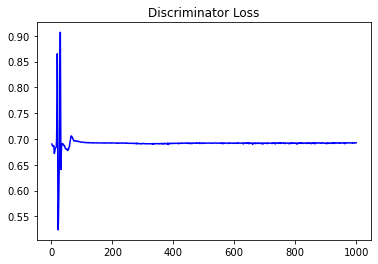

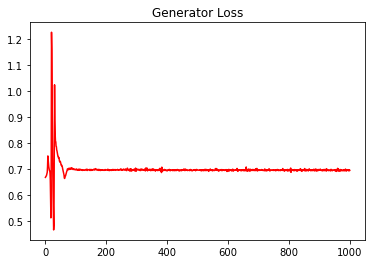

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.22973956341095328


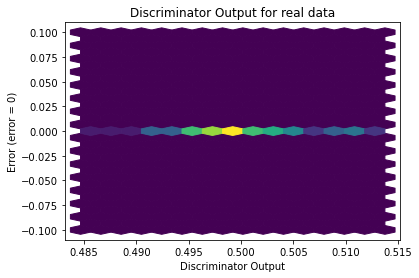

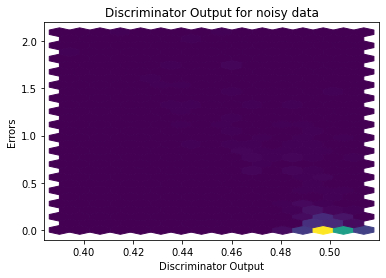

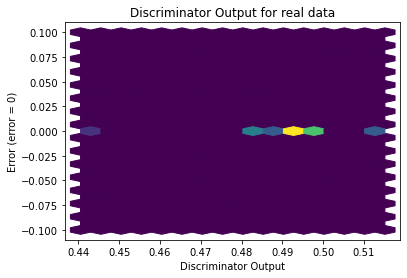

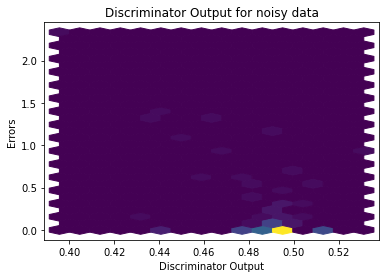

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


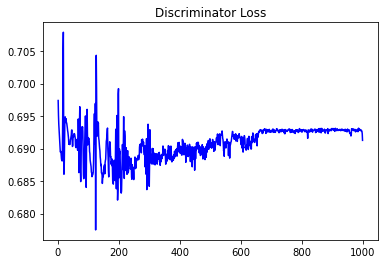

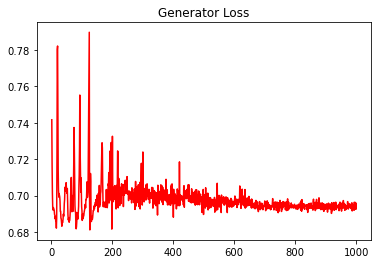

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1880674125892957


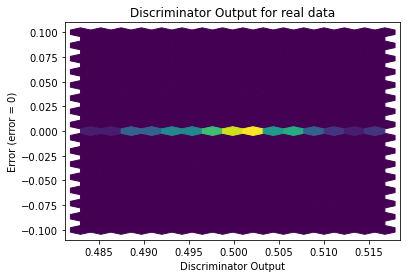

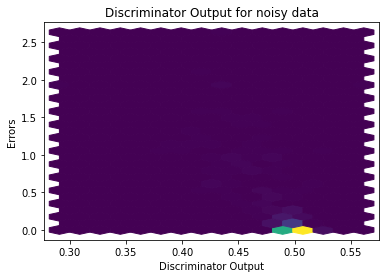

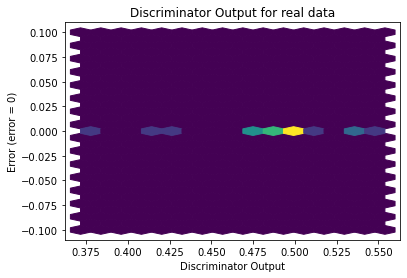

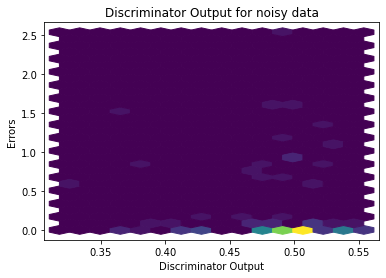

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2930]], requires_grad=True)
